In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.svm import SVR
import matplotlib.pyplot as plt

%matplotlib inline



### run cleaning notebook to avoid saving it as a csv
# %run Cleaning_EDA.ipynb

#### Running Cleaning Notebook

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 10 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Cancer Site                                                1254 non-null   object
 1   Year                                                       1254 non-null   object
 2   Sex                                                        1254 non-null   object
 3   Age                                                        1254 non-null   object
 4   Incidence and Survival Assumptions                         1254 non-null   object
 5   Annual Cost Increase (applied to initial and last phases)  1254 non-null   object
 6   Total Costs                                                1254 non-null   object
 7   Initial Year After Diagnosis Cost                          1254 non-null   object
 8   Continuing Phase C

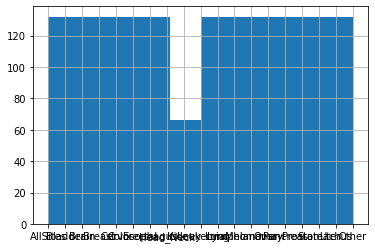

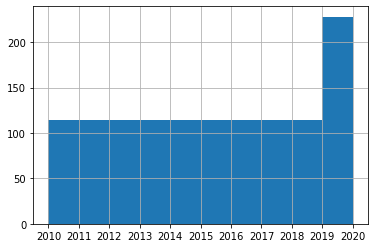

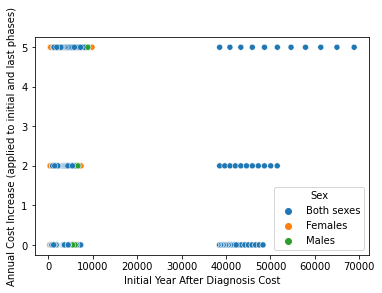

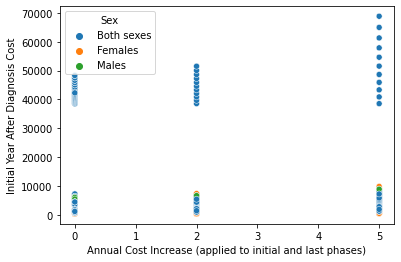

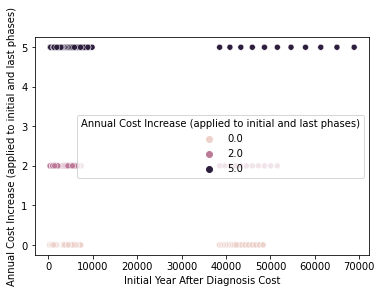

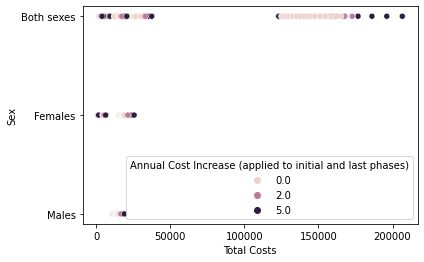

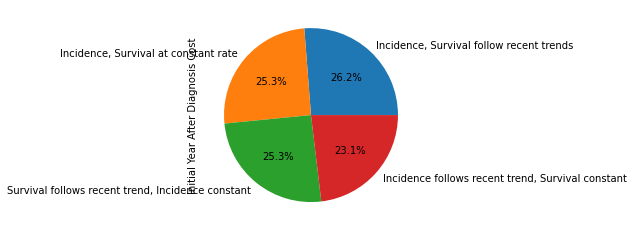

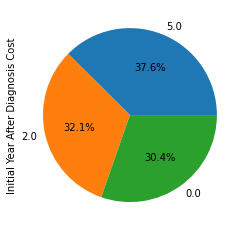

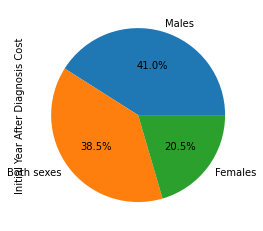

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 9 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Cancer Site                                                1254 non-null   object 
 1   Year                                                       1254 non-null   object 
 2   Sex                                                        1254 non-null   object 
 3   Incidence and Survival Assumptions                         1254 non-null   object 
 4   Annual Cost Increase (applied to initial and last phases)  1254 non-null   float64
 5   Total Costs                                                1254 non-null   float64
 6   Initial Year After Diagnosis Cost                          1254 non-null   float64
 7   Continuing Phase Cost                                      1254 non-null   float64
 8   Last Year

In [2]:
### run cleaning notebook to avoid saving it as a csv
%run Cleaning_EDA.ipynb

In [3]:
# x, y variables:
total_costs_label.head(3)

0    124565.6
1    122420.8
2    125397.7
Name: Total Costs, dtype: float64

In [4]:
data_frame.head(3)

,Annual Cost Increase (applied to initial and last phases),Initial Year After Diagnosis Cost,Initial Cost Squared,2010,2011,2012,2013,2014,2015,2016,...,Cancer Site_Prostate,Cancer Site_Stomach,Cancer Site_Uterus,Sex_Females,Sex_Males,"Incidence and Survival Assumptions_Incidence, Survival at constant rate","Incidence and Survival Assumptions_Incidence, Survival follow recent trends","Incidence and Survival Assumptions_Survival follows recent trend, Incidence constant",Annual Cost Increase - Cat_2.0,Annual Cost Increase - Cat_5.0
0,0.0,0.585875,0.345305,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,0.558006,0.313461,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.585875,0.345305,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
X = data_frame
y = total_costs_label

In [6]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))
print(len(y_train), len(y_test))

Training Set: 940 rows
Test Set: 314 rows
940 314


In [7]:
# linear as baseline
# lasso regression
# gradient boost
# random forest
# knn
# svm

# grid search

#### Using Linear Regression as the Baseline Model

In [8]:
lin_reg = LinearRegression().fit(X_train, y_train)

In [9]:
lin_preds = lin_reg.predict(X_test)

np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(lin_preds)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [  5312. 134872.   4904.  26409.   6756.   2617.  15444.  13725.   1824.
   1789.]
Actual labels   :  471       4912.9
119     129776.9
877       4598.9
682      26827.7
1106      6158.7
953       2544.5
1116     15816.9
603      13930.6
540       2493.4
721       1552.2
Name: Total Costs, dtype: float64


In [10]:
mse = mean_squared_error(y_test, lin_preds)
print("MSE:", mse)

MSE: 1598331.8752690216


In [11]:
rmse = np.sqrt(mse)
print('RMSE: ', rmse)

RMSE:  1264.2515079164516


In [12]:
r2 = r2_score(y_test, lin_preds)
print('R2: ', r2)

R2:  0.9982060095518372


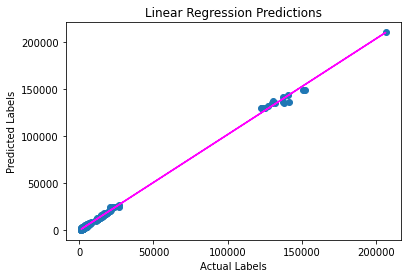

In [13]:
# Plot predicted vs actual
plt.scatter(y_test, lin_preds)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Linear Regression Predictions')
# overlay the regression line
z = np.polyfit(y_test, lin_preds, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### Lasso Regression

In [16]:
lasso_alg = Lasso().fit(X_train, y_train)
print(lasso_alg)

Lasso()


In [17]:
lasso_preds = lasso_alg.predict(X_test)

np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(lasso_preds)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [  5570. 133368.   4662.  26664.   6866.   2125.  15706.  13214.   1807.
   1975.]
Actual labels   :  471       4912.9
119     129776.9
877       4598.9
682      26827.7
1106      6158.7
953       2544.5
1116     15816.9
603      13930.6
540       2493.4
721       1552.2
Name: Total Costs, dtype: float64


In [18]:
mse = mean_squared_error(y_test, lasso_preds)
print("MSE:", mse)

rmse = np.sqrt(mse)
print('RMSE: ', rmse)

r2 = r2_score(y_test, lasso_preds)
print('R2: ', r2)

MSE: 1532001.7588454406
RMSE:  1237.7405862479588
R2:  0.9982804594186833


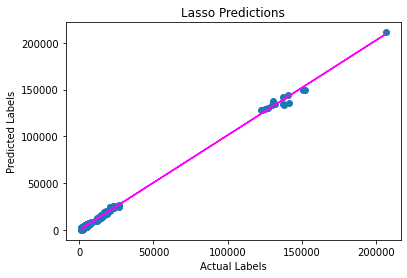

In [19]:
# Plot predicted vs actual
plt.scatter(y_test, lasso_preds)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Lasso Predictions')
# overlay the regression line
z = np.polyfit(y_test, lasso_preds, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### Grid Search

Place elsewhere or use within each run

In [ ]:
## grid search



# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()



#### Random Forest Regressor

In [ ]:
# Random Forest regressor using GridSearch
rf_model = RandomForestRegressor()

params = {
    '': []
    '': []
}

# Optimizing for R2
score = make_scorer(r2_score)
rf_grid = GridSearchCV(rf_model, params, scoring=score, cv=5, return_train_score=True)
rf_grid.fit(X_train, y_train)
print("Best parameter combination:", rf_grid.best_params_, "\n")

# Get the best model
rf_model=rf_grid.best_estimator_
print(model, "\n")

In [ ]:
rf_preds = rf_model.predict(X_test)

np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(rf_preds)[:10])
print('Actual labels   : ' ,y_test[:10])

In [ ]:
mse = mean_squared_error(y_test, rf_preds)
print("MSE:", mse)

rmse = np.sqrt(mse)
print('RMSE: ', rmse)

r2 = r2_score(y_test, rf_preds)
print('R2: ', r2)

In [ ]:
# Plot predicted vs actual
plt.scatter(y_test, rf_preds)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Random Forest Predictions')
# overlay the regression line
z = np.polyfit(y_test, rf_preds, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### Gradient Boost Regressor

In [ ]:
# Gradient Boosting regressor using GridSearch
gb_model = GradientBoostingRegressor()

params = {
    '': []
    '': []
}

# Optimizing for R2
score = make_scorer(r2_score)
gb_grid = GridSearchCV(gb_model, params, scoring=score, cv=5, return_train_score=True)
gb_grid.fit(X_train, y_train)
print("Best parameter combination:", gb_grid.best_params_, "\n")

# Get the best model
gb_model=gb_grid.best_estimator_
print(model, "\n")

In [ ]:
gb_preds = gb_model.predict(X_test)

np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(gb_preds)[:10])
print('Actual labels   : ' ,y_test[:10])

In [ ]:
mse = mean_squared_error(y_test, gb_preds)
print("MSE:", mse)

rmse = np.sqrt(mse)
print('RMSE: ', rmse)

r2 = r2_score(y_test, gb_preds)
print('R2: ', r2)

In [ ]:
# Plot predicted vs actual
plt.scatter(y_test, gb_preds)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Random Forest Predictions')
# overlay the regression line
z = np.polyfit(y_test, gb_preds, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### KNN Regressor

In [ ]:
# KNN regressor using GridSearch
# want multiple runs of multiple Ks

kn_model = KNeighborRegressor()

params = {
    '': []
    '': []
}

# Optimizing for R2
score = make_scorer(r2_score)
kn_grid = GridSearchCV(kn_model, params, scoring=score, cv=5, return_train_score=True)
kn_grid.fit(X_train, y_train)
print("Best parameter combination:", kn_grid.best_params_, "\n")

# Get the best model
kn_model1=kn_grid.best_estimator_
print(model, "\n")

In [ ]:
# KNN regressor using GridSearch
# want multiple runs of multiple Ks

kn_model = KNeighborRegressor()

params = {
    '': []
    '': []
}

# Optimizing for R2
score = make_scorer(r2_score)
kn_grid = GridSearchCV(kn_model, params, scoring=score, cv=5, return_train_score=True)
kn_grid.fit(X_train, y_train)
print("Best parameter combination:", kn_grid.best_params_, "\n")

# Get the best model
kn_model2=kn_grid.best_estimator_
print(model, "\n")

In [ ]:
# KNN regressor using GridSearch
# want multiple runs of multiple Ks

kn_model = KNeighborRegressor()

params = {
    '': []
    '': []
}

# Optimizing for R2
score = make_scorer(r2_score)
kn_grid = GridSearchCV(kn_model, params, scoring=score, cv=5, return_train_score=True)
kn_grid.fit(X_train, y_train)
print("Best parameter combination:", kn_grid.best_params_, "\n")

# Get the best model
kn_model3=kn_grid.best_estimator_
print(model, "\n")

In [ ]:
kn_preds = kn_model'#'.predict(X_test)

np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(kn_preds)[:10])
print('Actual labels   : ' ,y_test[:10])

In [ ]:
mse = mean_squared_error(y_test, kn_preds)
print("MSE:", mse)

rmse = np.sqrt(mse)
print('RMSE: ', rmse)

r2 = r2_score(y_test, kn_preds)
print('R2: ', r2)

In [ ]:
# Plot predicted vs actual
plt.scatter(y_test, kn_preds)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Random Forest Predictions')
# overlay the regression line
z = np.polyfit(y_test, kn_preds, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
A = kn_model.kneighbors_graph(X_train)
A.toarray()
print(kn_model.predict([[1.5]]))

In [ ]:
## multiple runs

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, y)

print(neigh.predict([[1.5]]))


neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples)



neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(X)

A = neigh.kneighbors_graph(X)
A.toarray()


#### SVM Regressor

In [ ]:
# Gradient Boosting regressor using GridSearch
gb_model = GradientBoostingRegressor()

params = {
    '': []
    '': []
}

# Optimizing for R2
score = make_scorer(r2_score)
gb_grid = GridSearchCV(gb_model, params, scoring=score, cv=5, return_train_score=True)
gb_grid.fit(X_train, y_train)
print("Best parameter combination:", gb_grid.best_params_, "\n")

# Get the best model
gb_model=gb_grid.best_estimator_
print(model, "\n")

In [ ]:
gb_preds = gb_model.predict(X_test)

np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(gb_preds)[:10])
print('Actual labels   : ' ,y_test[:10])

In [ ]:
mse = mean_squared_error(y_test, gb_preds)
print("MSE:", mse)

rmse = np.sqrt(mse)
print('RMSE: ', rmse)

r2 = r2_score(y_test, gb_preds)
print('R2: ', r2)

In [ ]:
# Plot predicted vs actual
plt.scatter(y_test, gb_preds)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Random Forest Predictions')
# overlay the regression line
z = np.polyfit(y_test, gb_preds, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
# SV regressor using GridSearch
linear_svr = svm.SVR(kernel='linear')
linear_svr.kernel

rbf_svr = svm.SVR(kernel='rbf')
rbf_svr.kernel

poly_svr = svm.SVR(kernel='poly')
poly_svr.kernel


In [ ]:
# SV regressor using GridSearch
linear_svr = svm.SVR(kernel='linear')
linear_svr.kernel

rbf_svr = svm.SVR(kernel='rbf')
rbf_svr.kernel

poly_svr = svm.SVR(kernel='poly')
poly_svr.kernel

# need to create a set of parameters for each model
# need to run a grid search for each set of parameters and each model
params = {
    '': []
    '': []
}

# Optimizing for R2
score = make_scorer(r2_score)
gb_grid = GridSearchCV(gb_model, params, scoring=score, cv=5, return_train_score=True)
gb_grid.fit(X_train, y_train)
print("Best parameter combination:", gb_grid.best_params_, "\n")

# Get the best model
gb_model=gb_grid.best_estimator_
print(model, "\n")



linear_svr = svm.SVR(kernel='linear')
linear_svr.kernel

rbf_svr = svm.SVR(kernel='rbf')
rbf_svr.kernel

poly_svr = svm.SVR(kernel='poly')
poly_svr.kernel

print(__doc__)


# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()